# Linear Regression

## predict the percentage of marks that a student is expected to score.

in this regression task we will predict the percentage of marks that a student is expected to score based up the number of hours they studied. this is a simple linear regression task it involves just two variables.

### importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('student_scores.csv')
print('the imported data: \n', data)

the imported data: 
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## let's visualize our data

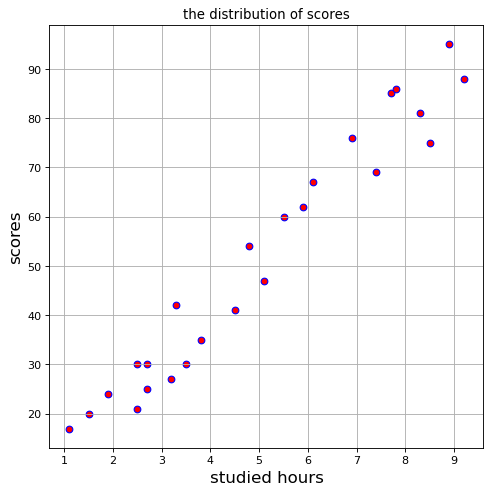

In [18]:
fig = plt.figure(figsize = (7, 7), dpi = 80)
plt.scatter(data['Hours'], data['Scores'], facecolor = 'r', edgecolor = 'b')
plt.xlabel('studied hours', fontsize = 15)
plt.ylabel('scores',  fontsize = 15)
plt.title('the distribution of scores')
plt.grid(True)
plt.show()

#### from the graph below, we can see clearly that there is a positive linear relation between the studied hours and the scores

# Preparing the data for training

In [38]:
hours = data.iloc[:, :-1].values
score = data.iloc[:, 1].values

In [39]:
from sklearn.model_selection import train_test_split

train_data, test_data, lbl_train, lbl_test = train_test_split(hours, score, test_size = 0.2)

# Training the Algorithm

In [40]:
from sklearn.linear_model import LinearRegression


regr = LinearRegression()
regr.fit(train_data, lbl_train)

print('training complete')

training complete


### make predictions using the testing set

In [41]:
print(test_data)
data_pred = regr.predict(test_data)

[[5.1]
 [3.2]
 [7.8]
 [7.4]
 [4.8]]


### comparing the actual vs the predicted

In [43]:
predicted_data = pd.DataFrame({'Actual':lbl_test, 'Predicted_score':data_pred})
print(predicted_data)

   Actual  Predicted_score
0      47        52.614143
1      27        34.266659
2      86        78.686882
3      69        74.824254
4      54        49.717171


### the coefficients and evaluations


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("the coefficients:\n", regr.coef_)
print("Mean absolute error: %.2f" % mean_absolute_error(lbl_test, data_pred))
print("Mean squared  error: %.2f" % mean_squared_error(lbl_test, data_pred))

the coefficients:
 [9.65657012]
Mean absolute error: 6.06
Mean squared  error: 38.01


### plotting for the test data

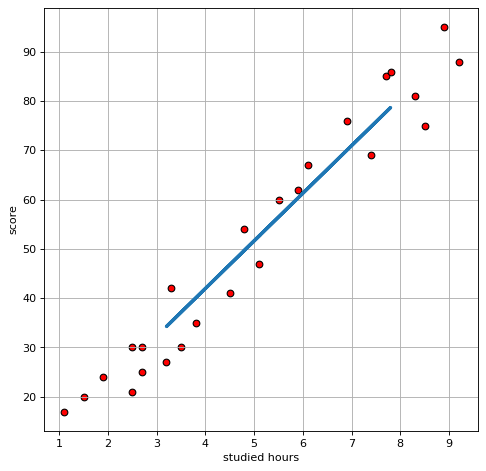

In [68]:
fig = plt.figure(figsize=(7, 7), dpi = 80)
plt.scatter(x=data['Hours'], y=data['Scores'], color = "red", edgecolor = "black")
plt.plot(test_data, data_pred, linewidth= 3)
plt.grid(True)
plt.xlabel('studied hours', fontsize=10)
plt.ylabel('score', fontsize=10)

plt.show()